In [91]:
import numpy as np
import pandas as pd
from os import listdir
import networkx as nx
from copy import deepcopy
import matplotlib.pyplot as plt
import Compute_Scaffold_Coverages_Utility as cc
from importlib import reload

colors = ['red','blue','green','cyan','yellow',
          'magenta','grey','black','gold','purple',
          'indigo','orange','olive','pink','violet']

def Plot_Cycle_Coverages(conn, df_coverage):
    cycles = list(nx.simple_cycles(conn))
    if len(cycles) > 1:
        return
    else:
        fig,ax = plt.subplots(1,1,figsize = (16,10))
        print(cycles)
        for i in range(1, len(cycles[0])):
            g_ = deepcopy(conn)
            print(len(g_.edges()))
            edge = (cycles[0][i-1], cycles[0][i])
            g_.remove_edge(*edge)
            coverage, longest_coverage, df_depths = cc.Compute_Coverage(g_, df_coverage)
            ax.plot(coverage, color = colors[i], label = str(edge))
            print(edge, conn.edges[edge]['mean'], conn.edges[edge]['bsize'])
            print(df_depths.head())
        ax.legend()
        fig.tight_layout()
    return fig

In [80]:
graphspath = '/Users/harihara/Mount/MetaCarvel_paper/hmp_scaffolds/stool/'
covpath = '/Users/harihara/Research-Activities/Data/Binnacle-Op/genomecov_d/'
samples = listdir(covpath)
samples.sort()
sample = 'SRS143342'
reload(cc)
G = nx.read_gml(graphspath+sample+'/'+sample+'_scaffolds/oriented.gml')

In [81]:
Graph_path= graphspath+sample+'/'+sample+'_scaffolds/oriented.gml'
df_coverage, G = cc.Load_Read_Coverage_and_Assembly_Graph(Graph_path, covpath+sample+'.txt')

<class 'pandas.core.frame.DataFrame'>
Index: 69893138 entries, 10003 to contig-100_9995.106104
Data columns (total 2 columns):
Loc         int64
coverage    int32
dtypes: int32(1), int64(1)
memory usage: 1.3+ GB
None


In [92]:
conn_comps = list(nx.weakly_connected_component_subgraphs(G))
test = conn_comps[2026]
min_node, min_indegree = cc.Return_Starting_Point(test)
if min_indegree > 0:
    test = cc.Random_Simplify(test, min_node)
nodes = list(test.nodes())
df_coverage_cc = df_coverage.loc[nodes]
coverage, df_depths = cc.Compute_Coverage(test, df_coverage_cc, min_node)
coords = dict(zip(df_depths.index.tolist(), df_depths['Coords'].tolist()))
mean_ratios = cc.Helper_Changepoints(deepcopy(coverage))
outliers = cc.ID_Peaks(mean_ratios)
outliers = cc.Filter_Neighbors(outliers, mean_ratios)
top_sort = df_depths.index.tolist()
Pos_Dict = cc.Return_Contig_Scaffold_Positions(coords)
df_depths = df_depths.loc[top_sort]
g_removed = cc.Get_Outlier_Contigs(outliers, Pos_Dict, coords, test, 100)
        

In [61]:
ctr = 0
for c in conn_comps[1:]:
    
    ctr += 1
    if not nx.is_directed_acyclic_graph(c):
        print(ctr, 'Nodes', len(c.nodes()), len(list(nx.simple_cycles(c))))
        for node in c:
            print(node, c.in_degree(node))
        print('**********','\n\n')
        #Plot_Cycle_Coverages(c, df_coverage.loc[list(c.nodes())])
        #break

11 Nodes 3 1
1021 1
contig-100_2011.2011 1
contig-100_3780.3780 1
********** 


18 Nodes 5 1
contig-100_184.17412 1
1034 0
contig-100_1189.18417 2
contig-100_736.17964 1
contig-100_1035.18263 1
********** 


33 Nodes 22 1
contig-100_2231.16746 1
810 0
contig-100_2846.2846 2
contig-100_714.15229 1
contig-100_2320.16835 1
539 1
1294 2
816 2
732 2
contig-100_2373.2373 2
contig-100_187.17415 1
902 1
contig-100_2269.16784 1
contig-100_1002.18230 2
contig-100_5202.5202 1
contig-100_1891.16406 0
1063 1
1083 1
contig-100_1502.16017 1
contig-100_180.14695 2
contig-100_2232.16747 1
contig-100_4908.4908 0
********** 


39 Nodes 15 1
contig-100_1068.15583 0
contig-100_1848.16363 3
387 1
contig-100_810.15325 1
1086 2
contig-100_1799.16314 1
contig-100_1245.15760 1
1337 1
949 1
contig-100_3882.3882 1
1300 2
contig-100_1864.16379 2
contig-100_2087.16602 0
1157 1
197 2
********** 


48 Nodes 8 1
contig-100_2131.2131 1
contig-100_616.15131 1
contig-100_3397.3397 1
1123 2
1358 2
941 2
contig-100_2228.16

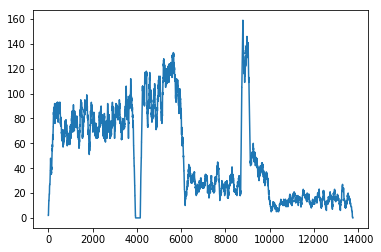

In [93]:
plt.plot(coverage)

In [94]:
len(nodes)

8

In [89]:
nodes

['2871',
 '17208',
 'contig-100_1879.140091',
 'contig-100_1411.139623',
 'contig-100_600.138812',
 'contig-100_2670.130142',
 'contig-100_3542.141754',
 'contig-100_2024.140236']

In [95]:
min_node

'2871'

In [98]:
len(list(nx.weakly_connected_component_subgraphs(g_removed)))#.weakly_connected_component_subgraphs())

2